In [1]:
%matplotlib inline

from time import time
from math import sqrt, floor
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace
from pandas.plotting import scatter_matrix
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.style.use = "default"

In [2]:
def merge(df, labels):
    return labels.merge(df, left_index=True,right_index=True)

In [5]:
train = pd.read_csv("TestData5.txt", header=None, delim_whitespace=True)
labels = pd.read_csv("TrainLabel5.txt", sep='\t', header=None, names=["labels"])

In [8]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1119.000,1119.000,1119.000,1119.000,1119.000,1119.000,1119.000,1119.000,1119.000,1119.000,1119.000
mean,8.306,0.528,0.267,2.563,0.087,15.925,46.979,0.997,3.308,0.653,10.406
std,1.725,0.179,0.192,1.467,0.045,10.483,33.266,0.002,0.153,0.164,1.058
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.870,0.330,8.700
25%,7.100,0.390,0.100,1.900,0.071,7.000,22.000,0.996,3.200,0.550,9.500
50%,7.900,0.520,0.250,2.200,0.080,14.000,38.000,0.997,3.300,0.620,10.100
75%,9.200,0.637,0.420,2.600,0.091,22.000,63.000,0.998,3.400,0.720,11.000
max,15.600,1.580,0.790,15.500,0.611,72.000,278.000,1.004,4.010,1.980,14.000


In [25]:
labels["labels"].value_counts()

5    471
6    447
7    141
4     39
8     14
3      7
Name: labels, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108092a20>,
      dtype=object)

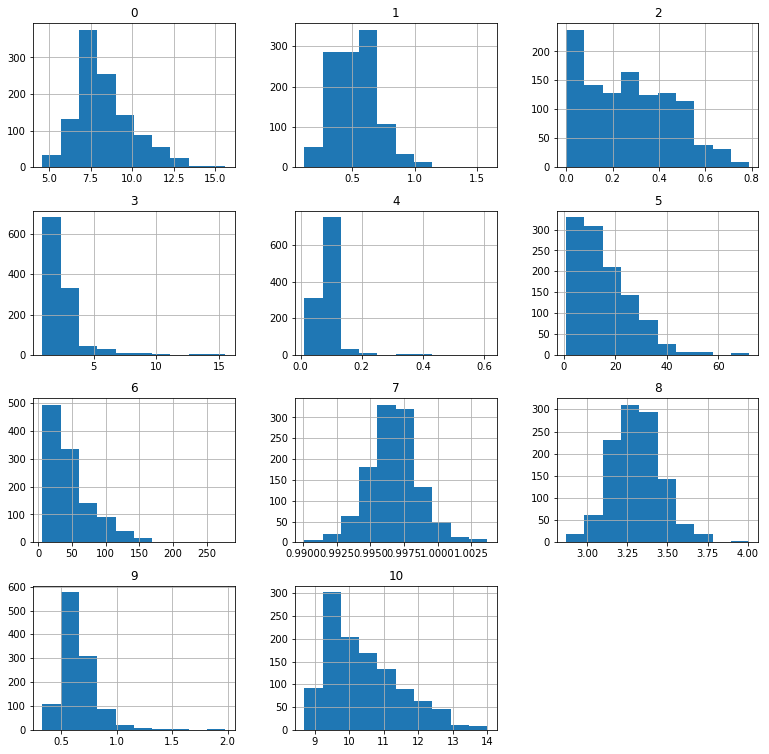

In [12]:
train.hist(figsize=(13,13))

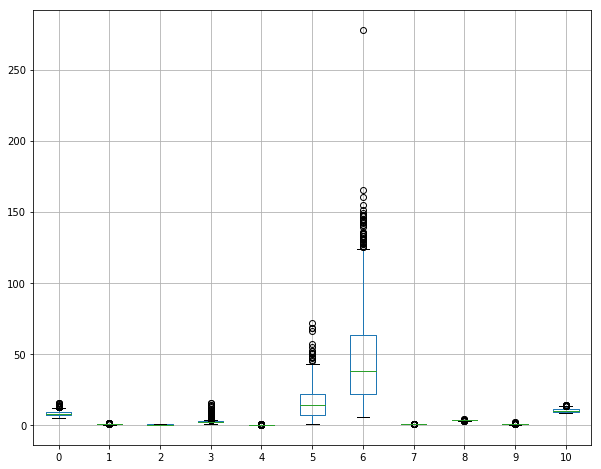

In [17]:
train.boxplot(figsize=(10,8))

In [31]:
merged = merge(train, labels)
merged.groupby("labels").describe()

0                                                   1         \
         count  mean   std   min   25%   50%    75%    max   count  mean   
labels                                                                     
3        7.000 7.614 1.269 6.700 6.950 7.300  7.500 10.400   7.000 0.948   
4       39.000 7.715 1.727 4.600 6.700 7.500  8.300 12.500  39.000 0.680   
5      471.000 8.176 1.529 5.200 7.200 7.800  8.900 15.600 471.000 0.577   
6      447.000 8.349 1.793 4.700 7.000 7.900  9.500 13.800 447.000 0.497   
7      141.000 8.785 1.992 5.100 7.300 8.700 10.000 15.600 141.000 0.414   
8       14.000 8.464 2.082 5.000 7.250 7.900  9.850 12.600  14.000 0.412   

        ...      9             10                                          \
        ...     75%   max   count   mean   std   min    25%    50%    75%   
labels  ...                                                                 
3       ...   0.590 0.860   7.000 10.164 0.464 9.700  9.850  9.950 10.450   
4       ...   0.595 1.120  39.000 10.281 0.956 9.000  9.600 10.000 11.000   
5       ...   0.650 1.980 471.000  9.876 0.715 8.800  9.400  9.600 10.200   
6       ...   0.745 1.950 447.000 10.595 1.034 8.700  9.800 10.500 11.300   
7       ...   0.820 1.360 141.000 11.478 0.993 9.200 10.800 11.500 12.300   
8       ...   0.820 1.100  14.000 11.857 1.207 9.800 11.075 11.750 12.775   

               
          max  
labels         
3      10.900  
4      13.100  
5      13.000  
6      14.000  
7      13.600  
8      14.000  

[6 rows x 88 columns]

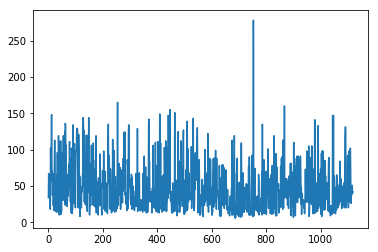

In [34]:
train[6].plot.line()

In [6]:
train.drop(train[6][train[6] > 200].index[0], inplace=True)

In [56]:
corr = train.corr()
corr[corr > .7][corr.lt(1)]

,0,1,2,3,4,5,6,7,8,9,10
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [7]:
labels = merge(train, labels).pop("labels")
labels.to_csv("cleaned_labels.csv")
train.to_csv("cleaned_test.csv")